In [ ]:
import pandas as pd
import numpy as np
import keras
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [ ]:
from keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers import concatenate
from keras.optimizers import Adam
from keras.regularizers import l1, l2
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from keras import regularizers
from keras.callbacks import EarlyStopping,ModelCheckpoint
import seaborn as sns

In [ ]:
path = "/content/drive/MyDrive/lbp_oversampledtraining.csv"
data = pd.read_csv(path)
data.shape

(50505, 3)

In [ ]:
data.head

<bound method NDFrame.head of        emotion                                             pixels     Usage
0            0  144 164 212 49 151 150 170 87 91 8 179 145 118...  Training
1            0  35 158 175 203 77 40 145 171 186 161 184 74 11...  Training
2            0  79 53 177 29 216 202 40 151 199 214 100 80 93 ...  Training
3            0  186 188 46 196 225 49 125 211 112 105 205 114 ...  Training
4            0  58 80 185 85 80 15 118 161 155 106 45 39 11 12...  Training
...        ...                                                ...       ...
50500        6  57 73 193 39 119 128 220 26 128 181 206 45 35 ...  Training
50501        6  18 123 155 153 158 223 83 104 173 56 47 112 16...  Training
50502        6  213 95 197 77 177 222 55 222 95 36 171 221 61 ...  Training
50503        6  212 53 207 37 170 103 210 112 36 159 214 206 1...  Training
50504        6  51 217 101 26 210 40 145 214 48 61 69 80 105 9...  Training

[50505 rows x 3 columns]>

In [ ]:
#shuffling the data
data = data.sample(frac=1)

In [ ]:
data.head

<bound method NDFrame.head of        emotion                                             pixels     Usage
42670        5  102 113 161 160 222 31 146 150 218 85 68 99 10...  Training
4309         0  186 76 44 155 224 69 159 188 82 59 42 174 151 ...  Training
26225        3  74 31 192 36 135 228 87 63 40 100 164 114 109 ...  Training
858          0  28 184 40 35 25 123 197 204 105 110 112 111 97...  Training
20746        2  36 164 45 127 59 26 182 76 53 181 197 54 147 8...  Training
...        ...                                                ...       ...
687          0  169 204 86 108 220 66 111 15 153 37 31 125 36 ...  Training
7597         1  154 160 201 47 44 198 69 81 87 72 75 113 71 70...  Training
33345        4  204 181 104 105 116 170 73 114 33 212 122 57 2...  Training
48338        6  30 193 172 37 115 47 37 209 210 116 105 199 23...  Training
10839        1  55 192 189 164 204 88 195 43 58 79 67 81 74 11...  Training

[50505 rows x 3 columns]>

In [ ]:
path = "/content/drive/MyDrive/lbp_testing.csv"
data1 = pd.read_csv(path)
data1.shape

(7178, 3)

In [ ]:
data1.head

<bound method NDFrame.head of       emotion                                             pixels    Usage
0           0  72 73 184 179 66 216 29 155 186 66 91 74 27 12...  Testing
1           0  68 214 185 208 124 105 86 99 195 170 217 115 7...  Testing
2           0  66 191 197 199 205 206 196 211 212 51 174 220 ...  Testing
3           0  163 158 212 215 102 83 78 54 213 121 74 43 115...  Testing
4           0  154 127 39 14 210 207 105 166 161 19 158 220 9...  Testing
...       ...                                                ...      ...
7173        6  33 189 193 103 82 67 70 149 225 71 77 68 169 1...  Testing
7174        6  125 191 214 106 70 89 42 41 144 206 207 195 21...  Testing
7175        6  179 150 205 77 29 162 156 193 69 115 105 75 81...  Testing
7176        6  211 76 74 67 82 113 111 110 39 40 35 34 41 41 ...  Testing
7177        6  165 156 177 102 75 66 77 103 203 78 50 159 76 ...  Testing

[7178 rows x 3 columns]>

In [ ]:
#shuffling the data
data1 = data1.sample(frac=1)

In [ ]:
data1.head

<bound method NDFrame.head of       emotion                                             pixels    Usage
4599        4  121 60 158 219 76 203 90 56 159 171 147 184 92...  Testing
1805        2  164 157 82 82 41 70 84 72 77 103 115 67 95 24 ...  Testing
3325        3  165 112 158 206 91 46 196 202 207 101 103 42 3...  Testing
4076        4  213 118 105 110 107 100 114 110 116 103 100 20...  Testing
5116        5  196 173 55 181 207 66 34 213 84 44 239 57 27 2...  Testing
...       ...                                                ...      ...
7140        6  83 223 61 37 153 145 208 207 53 211 69 87 66 8...  Testing
5706        5  91 122 153 105 34 232 86 199 165 166 134 52 21...  Testing
9           0  217 196 217 116 69 203 213 114 110 76 73 87 19...  Testing
2736        3  216 87 33 188 51 59 63 57 221 72 78 69 73 109 ...  Testing
4432        4  71 64 138 207 88 188 208 94 157 86 208 200 97 ...  Testing

[7178 rows x 3 columns]>

In [ ]:
train_pixels = data["pixels"].astype(str).str.split(" ").tolist()
train_pixels = np.uint8(train_pixels)
pixels = train_pixels.reshape((50505*2304,1))

In [ ]:
test_pixels = data1["pixels"].astype(str).str.split(" ").tolist()
test_pixels = np.uint8(test_pixels)
pixels1 = test_pixels.reshape((7178*2304,1))

In [ ]:
labels = to_categorical(data[['emotion']], num_classes=7)#convert class values into matrix
scaler = StandardScaler()
pixels = scaler.fit_transform(pixels)#for standarization
pixels = train_pixels.reshape((50505, 48, 48,1))

In [ ]:
labels1 = to_categorical(data1[['emotion']], num_classes=7)
scaler1 = StandardScaler()
pixels1 = scaler1.fit_transform(pixels1)
pixels1 = test_pixels.reshape((7178, 48, 48,1))

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(pixels, labels, test_size=0.2, shuffle=False)
X_test = pixels1
y_test = labels1

In [ ]:
datagen = ImageDataGenerator(  width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               horizontal_flip = True,
                               zoom_range = 0.2)
valgen = ImageDataGenerator(   width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               horizontal_flip = True,
                               zoom_range = 0.2)

In [ ]:
datagen.fit(X_train)
valgen.fit(X_val)
train_generator = datagen.flow(X_train, y_train, batch_size=64)#to read data from big numpy array
val_generator = datagen.flow(X_val, y_val, batch_size=64)

In [ ]:
def cnn_model():

    model= tf.keras.models.Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(2, 2))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(7, activation='softmax'))
    
    print(model.summary())
    model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])
    return model


In [ ]:
model = cnn_model()

model.summary()

checkpointer = [EarlyStopping(monitor = 'val_accuracy', verbose = 1, 
                              restore_best_weights=True,mode="max",patience = 5),
                ModelCheckpoint('cnnlbpmodel.h5',monitor="val_accuracy",verbose=1,
                                save_best_only=True,mode="max")]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       7

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


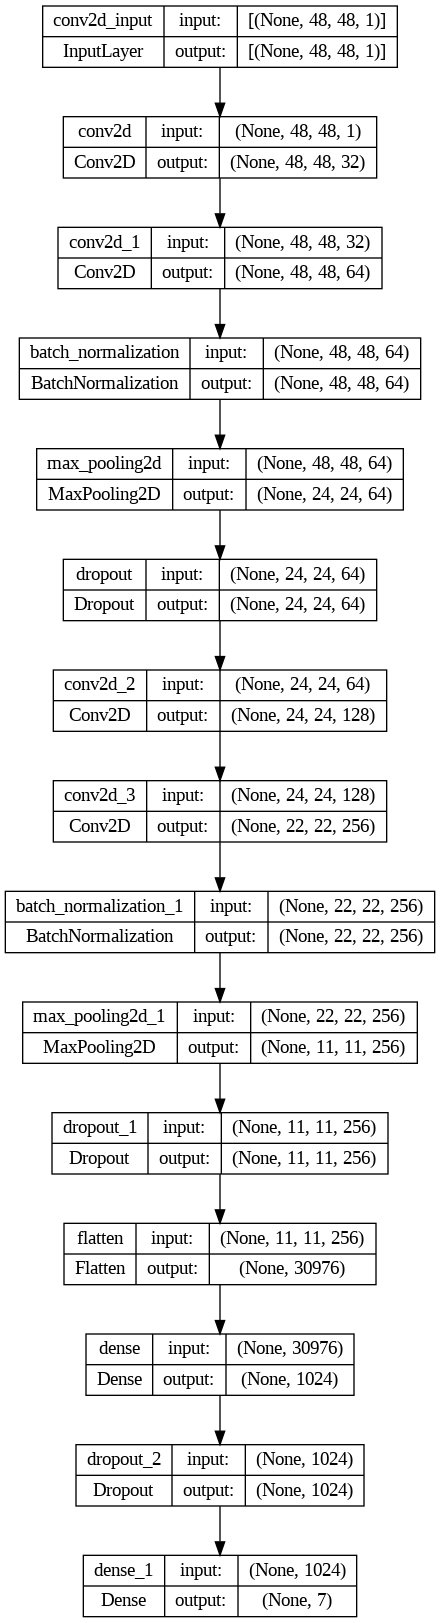

In [ ]:
plot_model(model, to_file='fernetover.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(train_generator,
                    epochs=60,
                    batch_size=64,   
                    verbose=1,
                    callbacks=[checkpointer],
                    validation_data=val_generator)

Epoch 1/60
631/632 [============================>.] - ETA: 0s - loss: 3.2186 - accuracy: 0.2812
Epoch 1: val_accuracy improved from 0.26671 to 0.33690, saving model to cnnmodel.h5
632/632 [==============================] - 35s 55ms/step - loss: 3.2180 - accuracy: 0.2812 - val_loss: 2.8584 - val_accuracy: 0.3369
Epoch 2/60
632/632 [==============================] - ETA: 0s - loss: 2.6411 - accuracy: 0.3292
Epoch 2: val_accuracy improved from 0.33690 to 0.37412, saving model to cnnmodel.h5
632/632 [==============================] - 34s 53ms/step - loss: 2.6411 - accuracy: 0.3292 - val_loss: 2.3519 - val_accuracy: 0.3741
Epoch 3/60
632/632 [==============================] - ETA: 0s - loss: 2.2486 - accuracy: 0.3686
Epoch 3: val_accuracy did not improve from 0.37412
632/632 [==============================] - 34s 54ms/step - loss: 2.2486 - accuracy: 0.3686 - val_loss: 2.2677 - val_accuracy: 0.3549
Epoch 4/60
631/632 [============================>.] - ETA: 0s - loss: 1.9890 - accuracy: 0.401

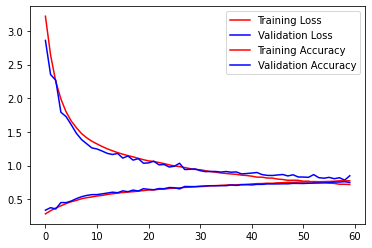

In [ ]:
plt.plot(history.history["loss"],'r', label="Training Loss")
plt.plot(history.history["val_loss"],'b', label="Validation Loss")
plt.legend()


plt.plot(history.history["accuracy"],'r',label="Training Accuracy")
plt.plot(history.history["val_accuracy"],'b',label="Validation Accuracy")
plt.legend()

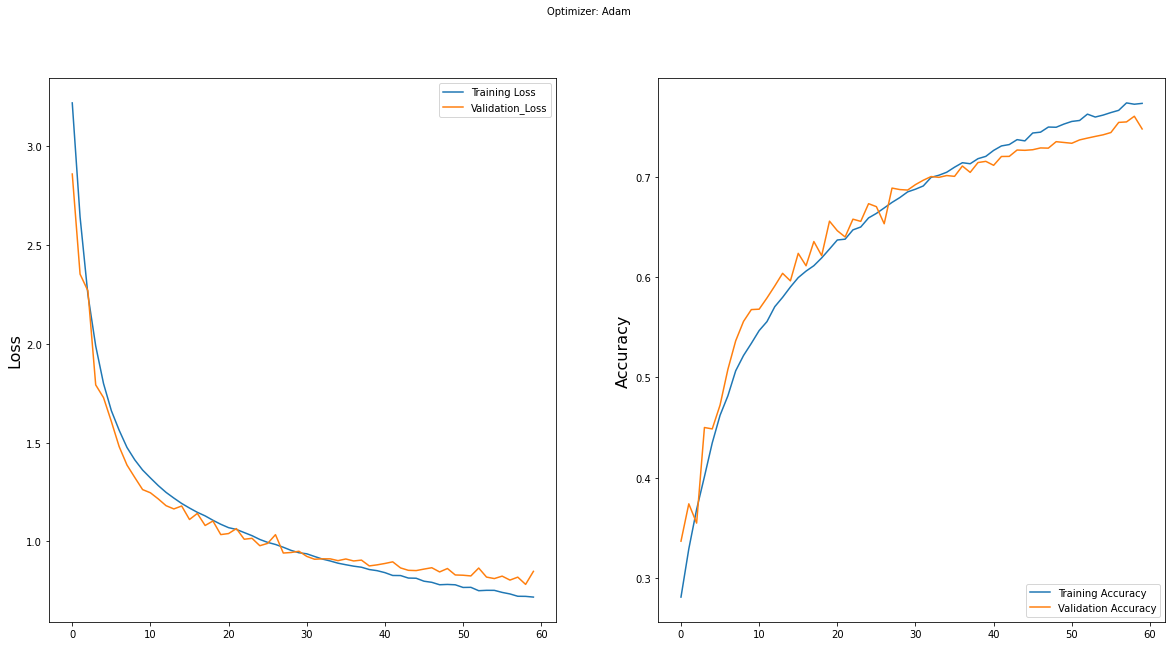

In [ ]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.suptitle('Optimizer: Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation_Loss')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
loss = model.evaluate(X_test,y_test) 
print("Test Acc: " + str(loss[1]))

225/225 [==============================] - 2s 8ms/step - loss: 1.2626 - accuracy: 0.6562
Test Acc: 0.6561716198921204


In [ ]:
preds = model.predict(X_test)
y_pred = np.argmax(preds , axis = 1 )

225/225 [==============================] - 1s 5ms/step


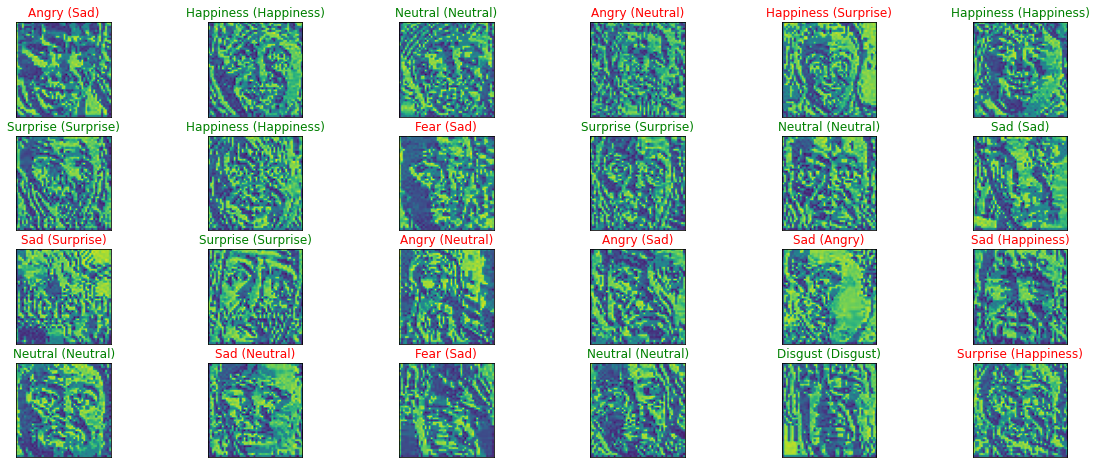

In [ ]:
#seeing predicted emotion and actual emotion of a randomly generated particular image of the testing dataset

label_dict = {0 : 'Angry', 1 : 'Disgust', 2 : 'Fear', 3 : 'Happiness', 4 : 'Sad', 5 : 'Surprise', 6 : 'Neutral'}

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=24, replace=False)):
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = label_dict[(y_pred[index])]
    true_index = label_dict[np.argmax(y_test,axis=1)[index]]
    
    ax.set_title("{} ({})".format((predict_index), 
                                  (true_index)),
                                  color=("green" if predict_index == true_index else "red"))

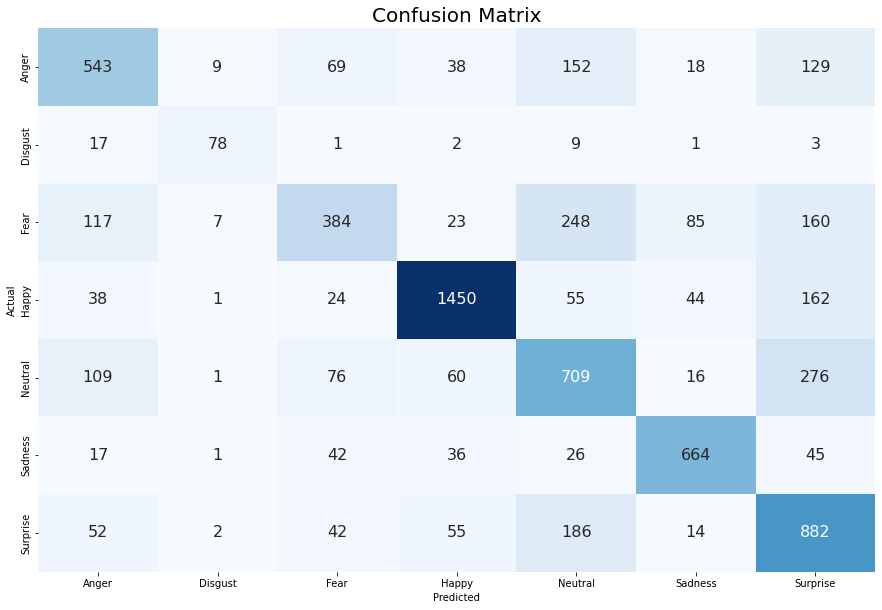

In [ ]:
CLASS_LABELS  = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', "Surprise"]

cm_data = confusion_matrix(np.argmax(y_test, axis = 1 ), y_pred)
cm = pd.DataFrame(cm_data, columns=CLASS_LABELS, index = CLASS_LABELS)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (15,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis = 1 ),y_pred,digits=3))

              precision    recall  f1-score   support

           0      0.608     0.567     0.587       958
           1      0.788     0.703     0.743       111
           2      0.602     0.375     0.462      1024
           3      0.871     0.817     0.844      1774
           4      0.512     0.569     0.539      1247
           5      0.789     0.799     0.794       831
           6      0.532     0.715     0.610      1233

    accuracy                          0.656      7178
   macro avg      0.672     0.649     0.654      7178
weighted avg      0.666     0.656     0.655      7178

